# SMUČARSKI SKOKI

Za projekt pri predmetu Programiranje 1 sem izbrala smučarske skoke. Podatke, ki jih bom v nadaljevanju analizirala, sem pridobila iz spletne strani https://data.fis-ski.com/global-links/all-fis-results.html?&gender_search=m&category_search=WC .


In [2]:
import pandas as pd
pd.options.display.max_rows = 25
pd.options.display.max_columns = 10

In [3]:
rezultati = pd.read_csv('rezultati.csv')
tekmovalci = pd.read_csv('tekmovalci.csv')
tekme = pd.read_csv('tekme.csv')

In [3]:
%matplotlib inline

V tabeli rezultati imamo zapisane uvrstitve tekmovalcev na tekmah svetovnega pokala (vključene so samo moške posamične tekme, ženske tekme, kvalifikacije in ekipne tekme v analizo niso vključene) v zadnjih 10 letih, torej med sezonama 2005/06 in 2015/16.
V tabeli tekmovalci imamo zapisane podatke o tekmovalcih, v tabeli tekme pa podatke o tekmah.

## 1. Dominantnost skakalcev med 2005/06 in 2015/16

Ker je eden izmed ciljev te analize podatkov ugotoviti uspešnost posameznih skakalcev v tem obdobju, se bomo osredotočili na število uvrstitev do določenega mesta.

In [74]:
rezultati.merge(tekmovalci, on='id_tekmovalca')

,mesto,id_tekmovalca,tocke,tekmovalec,leto_rojstva,drzava
0,1,1984,155.4,JANDA Jakub,1978,CZE
1,7,1984,283.7,JANDA Jakub,1978,CZE
2,2,1984,267.6,JANDA Jakub,1978,CZE
3,8,1984,261.0,JANDA Jakub,1978,CZE
4,29,1984,369.7,JANDA Jakub,1978,CZE
5,11,1984,252.6,JANDA Jakub,1978,CZE
6,4,1984,266.7,JANDA Jakub,1978,CZE
7,7,1984,256.1,JANDA Jakub,1978,CZE
8,1,1984,287.1,JANDA Jakub,1978,CZE
9,2,1984,263.2,JANDA Jakub,1978,CZE


Izračunamo povprečno uvrstitev tekmovalcev v zadnjih 10 letih, da dobimo malo občutka, kako nihajo forme tekmovalcev v malo daljšem časovnem obdobju. 

In [75]:
razvrstitve = rezultati.merge(tekmovalci, on='id_tekmovalca')[['mesto', 'tekmovalec']]
razvrstitve.groupby('tekmovalec').mean().sort_values('mesto', ascending=True)['mesto']

tekmovalec
SCHLIERENZAUER Gregor     7.807512
MORGENSTERN Thomas        8.639785
MALYSZ Adam               9.813953
AMMANN Simon             10.921875
PREVC Peter              11.144578
KRAFT Stefan             12.063158
FORFANG Johann Andre     12.297872
FREUND Severin           12.551913
JACOBSEN Anders          13.765432
BARDAL Anders            13.893023
PREVC Domen              15.055556
AHONEN Janne             15.271186
                           ...    
LEVKIN Yevgeniy          50.800000
ANTONISSEN Lars          51.000000
DE CRIGNIS Alessio       51.000000
JURIS Jaan               51.000000
SAMMELSELG Siim-Tanel    51.500000
MUMINOV Sabirzhan        51.500000
KANG Chil Gu             51.666667
NOMME Martti             52.250000
PCHELINTSEV Alexey       53.000000
PAERN Illimar            53.000000
NORDIN Carl              53.000000
LAMB Chris               62.000000
Name: mesto, dtype: float64

Rezultati so v skladu s pričakovanji, saj prva mesta na lestvici zasedajo sama zveneča imena tega športa. Pri podrobnejšem pregledu pa opazimo, da se razen Adama Malysza na prvih mestih nahajajo samo skakalci, ki so še vedno aktivni ali pa so svojo kariero končali v zadnjih dveh letih. Do odstopanj najverjetneje pride zaradi povečanega števila tekem na sezono v zadnjih nekaj letih, s čimer se poveča možnost za doseganje dobrih uvrstitev v primeru, da je tekmovalec v formi. Zaradi načina izbire podatkov pa se tekmovalec v podatkih pojavi le, če se je na tekmo kvalificiral, kar pomeni, da se morebiten slab skok v kvalifikacijah in s tem odsotnost na tekmi, v naših podatkih ne pokaže. Zasledimo tudi, da se Domen Prevc, kljub svoji mladosti nahaja na zelo visokem mestu, kar je posledica majhnega števila tekem na katerih je tekmoval, a dobrih uvrstitev na njih.

In [78]:
razvrstitve_tek = rezultati.merge(tekmovalci, on='id_tekmovalca')[['tocke', 'tekmovalec']]
razvrstitve_tekmovalec = razvrstitve_tek.groupby('tekmovalec').sum().sort_values('tocke', ascending=False)['tocke']
razvrstitve_tekmovalec

tekmovalec
AMMANN Simon             68521.8
STOCH Kamil              57118.0
SCHLIERENZAUER Gregor    55737.5
KRANJEC Robert           55280.7
BARDAL Anders            54355.9
KOFLER Andreas           52454.2
KASAI Noriaki            50911.0
NEUMAYER Michael         50657.0
LOITZL Wolfgang          50017.6
MORGENSTERN Thomas       48286.0
ITO Daiki                46668.4
KOCH Martin              44772.6
                          ...   
DE CRIGNIS Alessio          54.9
ZAPOTOCZNY Andrzej          54.5
KARPENKO Anatoliy           51.6
UMEZAKI Keita               46.7
KJELSTRUP Eirik             46.2
KADLEC Milos                39.9
OSANAI Yoshihiko            37.6
AALTO Antti                 36.1
GRIMHOLM Jakob              35.9
PLEKHOV Evgeni              27.6
KOBELEV Valery              20.4
SILAEV Alexey               12.0
Name: tocke, dtype: float64

Vidimo, da se na vrhu pojavijo določeni tekmovalci, ki jih v prejšnjem primeru ni bilo. To je zaradi tega, ker so ti skakalci najverjetneje zelo dobri letalci (Robert Kranjec, Kamil Stoch) in so na letalnicah dosegali zelo dobre rezultate, kar pomeni, da so si priskakali večje število točk (glede na to, katere točke gledamo), lahko so dobili celo do dvakrat več točk kot na tekmi na kateri od manjših skakalnic.

Če na podoben način izračunamo še povprečne uvrstitve držav v tem časovnem obdobju, ni prav nič presenetljivo, da se na vrhu razpredelnice pojavi Avstrija. Kar pa malo zbode v oči, je uvrstitev Švice na tretje mesto. To je posledica dejstva, da je bil Simon Ammann večino tega obdobja edini stalni član švicarske reprezentance in je za svojo državo dosegal dobre uvrstitve, ostali člani pa se večinoma niso kvalificirali na tekmo.

In [80]:
razvrstitve_drz = rezultati.merge(tekmovalci, on='id_tekmovalca')[['mesto', 'tekmovalec', 'drzava']]
razvrstitve_drz.groupby('drzava').mean().sort_values('mesto', ascending=True)['mesto'][:15]

drzava
AUT    17.701918
NOR    20.281875
SUI    20.949833
GER    22.815710
SLO    25.432295
JPN    26.063439
FIN    26.151402
POL    26.406375
CZE    27.639648
FRA    30.607330
RUS    30.668478
ITA    34.437500
BUL    35.175676
CAN    37.359551
GRE    39.000000
Name: mesto, dtype: float64

Da bi dobili bolj realno stanje držav v svetovnem pokalu, seštejemo število točk, ki so jih tekmovalci v tem času dosegli za svojo državo. (Točke v tem primeru niso mišljene kot število točk, ki jih tekmovalec dobi za uvrstitev med 30 najboljših na tekmi - zmagovalec 100,..., ampak kot število točk, ki ga je skakalec dobil glede na dolžino skoka in sodniške ocene.)

In [81]:
razvrstitve_drzave = rezultati.merge(tekmovalci, on='id_tekmovalca')[['tocke', 'tekmovalec', 'drzava']]
drzave = razvrstitve_drzave.groupby('drzava').sum().sort_values('tocke', ascending=False)['tocke'][:15]
drzave

drzava
AUT    415815.5
NOR    389173.4
GER    337815.7
SLO    269916.6
POL    248520.2
JPN    224281.6
FIN    204684.6
CZE    200677.7
SUI    133191.7
RUS    116443.9
FRA     62759.7
ITA     46108.0
KAZ     19195.9
USA     16786.5
CAN     11326.7
Name: tocke, dtype: float64

V tem primeru so dobljeni podatki veliko bolj v skladu s pričakovanji in odražajo realno stanje v svetovnem pokalu v tem obdobju.

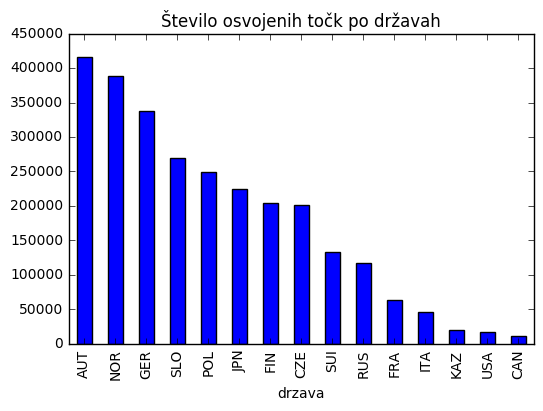

In [82]:
drzave.plot(kind='bar', title='Število osvojenih točk po državah')

## 2. Uspešnost tekmovalcev med 2005/06 in 2015/16

Ker bi želeli imeti natančnejši pregled uvrstitev posameznih tekmovalcev za izbrano časovno obdobje, izberemo 5 kriterijev glede na katere bomo primerjali njihovo uspešnost. To so : število uvrstitev med 30 najboljših (uvrstitev v 2. serijo tekme), število uvrstitev med 10 najboljših ter število tretjih, drugih in prvih mest.

In [83]:
med_30 = razvrstitve[razvrstitve.mesto<31]
med_30_max = med_30['tekmovalec'].value_counts()
med_10 = razvrstitve[razvrstitve.mesto<11]
med_10_max = med_10['tekmovalec'].value_counts()
tretji = razvrstitve[razvrstitve.mesto==3]
tretji_max = tretji['tekmovalec'].value_counts()
drugi = razvrstitve[razvrstitve.mesto==2]
drugi_max = drugi['tekmovalec'].value_counts()
prvi = razvrstitve[razvrstitve.mesto==1]
prvi_max = prvi['tekmovalec'].value_counts()

urejene_uvrstitve = {'1.mesto':prvi_max, '2.mesto':drugi_max, '3.mesto':tretji_max, 'med 10':med_10_max, 'med 30':med_30_max}
pd.DataFrame(urejene_uvrstitve)

,1.mesto,2.mesto,3.mesto,med 10,med 30
AARAAS Jon,NaN,NaN,NaN,NaN,7
AHONEN Janne,6.0,10.0,5.0,58.0,98
AIGNER Clemens,NaN,NaN,NaN,NaN,1
ALBORN Alan,NaN,NaN,NaN,NaN,1
ALEXANDER Nicholas,NaN,NaN,NaN,NaN,1
AMMANN Simon,22.0,25.0,23.0,152.0,240
AREN Andreas,NaN,NaN,NaN,NaN,5
ASCHENWALD Philipp,NaN,NaN,NaN,NaN,7
ASIKAINEN Lauri,NaN,NaN,NaN,4.0,25
BACHLEDA Marcin,NaN,NaN,NaN,NaN,9


Tekmovalce najprej razporedimo v tabelo tako, da dobimo podatke za vsakega skakalca posebej. Ker pa vidimo, da nekateri skakalci nimajo uvrstitev, ki bi ustrezale izbranim kriterijem, je bolje, da predstavimo 10 najboljših za vsako kategorijo posebej.

In [85]:
urejeno_30 = {'med 30':med_30_max}
pd.DataFrame(urejeno_30)[:10]

,med 30
AMMANN Simon,240
SCHLIERENZAUER Gregor,207
BARDAL Anders,193
STOCH Kamil,185
NEUMAYER Michael,182
KASAI Noriaki,180
LOITZL Wolfgang,180
KOFLER Andreas,180
MORGENSTERN Thomas,178
KRANJEC Robert,174


In [86]:
urejeno_10 = {'med 10':med_10_max}
pd.DataFrame(urejeno_10)[:10]

,med 10
SCHLIERENZAUER Gregor,156
AMMANN Simon,152
MORGENSTERN Thomas,133
FREUND Severin,118
KOFLER Andreas,100
BARDAL Anders,100
PREVC Peter,91
MALYSZ Adam,89
STOCH Kamil,88
KASAI Noriaki,86


In [87]:
urejeno_03 = {'3.mesto':tretji_max}
pd.DataFrame(urejeno_03)[:10]

,3.mesto
AMMANN Simon,23
MORGENSTERN Thomas,19
FREUND Severin,16
KASAI Noriaki,15
SCHLIERENZAUER Gregor,15
BARDAL Anders,14
MALYSZ Adam,13
KRANJEC Robert,12
PREVC Peter,11
KOCH Martin,10


In [88]:
urejeno_02 = {'2.mesto':drugi_max}
pd.DataFrame(urejeno_02)[:10]

,2.mesto
AMMANN Simon,25
MORGENSTERN Thomas,24
SCHLIERENZAUER Gregor,20
PREVC Peter,17
FREUND Severin,14
BARDAL Anders,13
KOFLER Andreas,12
JACOBSEN Anders,10
AHONEN Janne,10
KRAFT Stefan,9


In [89]:
urejeno_01 = {'1.mesto':prvi_max}
pd.DataFrame(urejeno_01)[:10]

,1.mesto
SCHLIERENZAUER Gregor,52
MORGENSTERN Thomas,22
AMMANN Simon,22
PREVC Peter,21
FREUND Severin,21
STOCH Kamil,15
KOFLER Andreas,12
MALYSZ Adam,11
JACOBSEN Anders,10
KRANJEC Robert,7


V tabelo z 10 tekmovalci z največ osvojenimi zmagami v zadnjih 10 letih, dodamo še število osvojenih 2. in 3. mest, da lahko te podatke malo primerjamo med seboj.

In [90]:
urejeno_stopnicke = {'1.mesto':prvi_max, '2.mesto':drugi_max, '3.mesto':tretji_max}
stopnicke = pd.DataFrame(urejeno_stopnicke).sort_values('1.mesto', ascending=False)[:10]
st = stopnicke.astype(int)
st

,1.mesto,2.mesto,3.mesto
SCHLIERENZAUER Gregor,52,20,15
MORGENSTERN Thomas,22,24,19
AMMANN Simon,22,25,23
FREUND Severin,21,14,16
PREVC Peter,21,17,11
STOCH Kamil,15,8,8
KOFLER Andreas,12,12,9
MALYSZ Adam,11,8,13
JACOBSEN Anders,10,10,8
BARDAL Anders,7,13,14


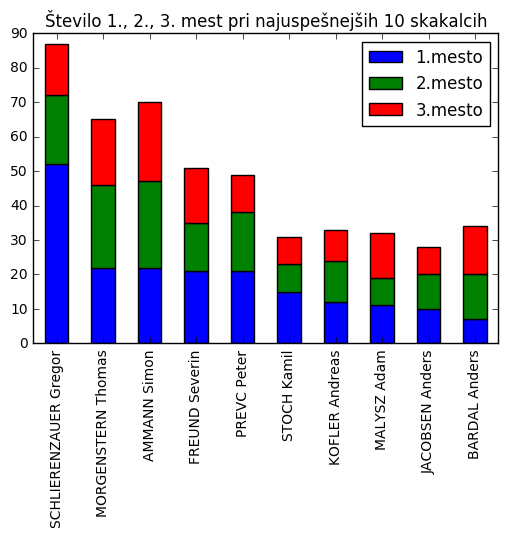

In [91]:
st.plot(kind = 'bar', stacked=True, title='Število 1., 2., 3. mest pri najuspešnejših 10 skakalcih')

Glede na rezultate bi lahko sklepali, da je Gregor Schlierenzauer po številu zmag veliko pred vsemi ostalimi skakalci. Če gledamo samo rezultate tega obdobja to sicer drži, vendar se takšna razlika pojavi predvsem, ker analizirano obdobje zajema večino njegove kariere, medtem ko za druge skakalce (npr.: Adam Malysz) to obdobje predstavlja le (manjši) del kariere.

## 3. Prizorišča

In [93]:
prizorisca = tekme[['prizorisce', 'drzava_prizorisca']]
st_prizorisc = prizorisca['prizorisce'].value_counts()
urejeno_prizorisca = {'število tekem':st_prizorisc}
prizorisca_tabela = pd.DataFrame(urejeno_prizorisca)
prizorisca_tabela

,število tekem
Engelberg,23
Planica,22
Lillehammer,22
Oberstdorf,18
Zakopane,18
Lahti,16
Sapporo,15
Bischofshofen,12
Willingen,12
Garmisch-Partenkirchen,11


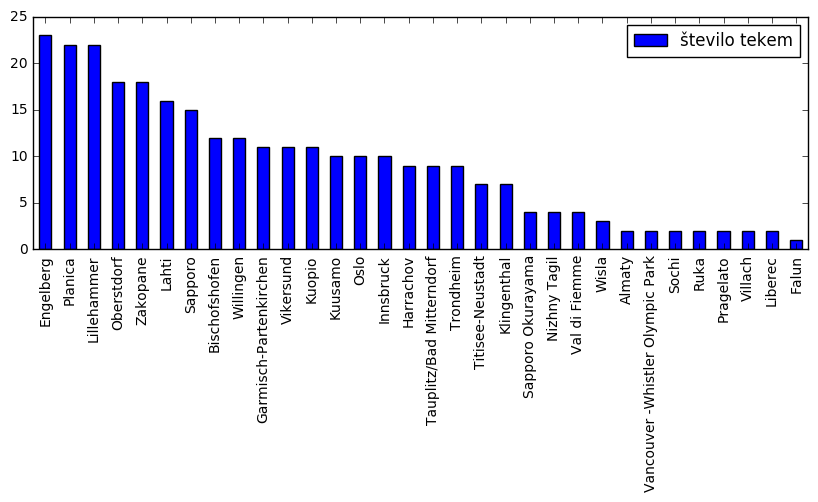

In [94]:
prizorisca_tabela.plot(kind='bar', figsize = (10,3), fontsize='10')

Kot vidimo iz grafa naša Planica spada med prizorišča, ki se redno pojavljajo v svetovnem pokalu. Navadno gosti 3 tekme na leto (od teh je ena ekipna), se pa lahko zgodi (npr. lani), da se v Planici odvije tudi kakšna tekma več, zaradi nadomeščanja odpadle tekme iz predhodnjega vikenda.

In [95]:
st_prizorisc_drz = prizorisca['drzava_prizorisca'].value_counts()
urejeno_prizorisca_drz = {'število tekem':st_prizorisc_drz}
prizorisca_drz_tabela = pd.DataFrame(urejeno_prizorisca_drz)
prizorisca_drz_tabela

,število tekem
GER,55
NOR,52
FIN,39
AUT,33
SUI,23
SLO,22
POL,21
JPN,19
CZE,11
RUS,6


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000DAE6CFA710>], dtype=object)

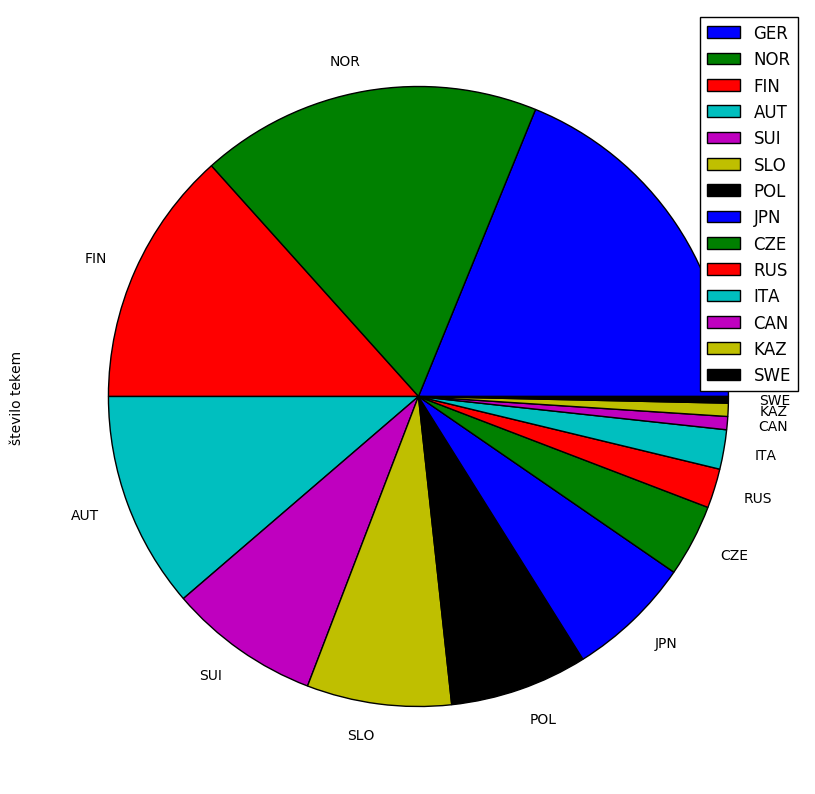

In [96]:
prizorisca_drz_tabela.plot(kind='pie', figsize=(10, 10), subplots=True, fontsize='10')

Kot vidimo se situacija precej spremeni, če pogledamo število tekem, ki jih gostijo posamezne države. To, da Nemčija, Avstrija, Norveška in Finska prednjačijo pred ostalimi državami, sploh ne preseneča, saj gre za skakalne velesile. Kar pa pomeni, da imajo večje število primernih skakalnic za organizacijo tekem, ter da je priljubljenost skokov med prebivalci države velika, torej je temu primerna tudi udeležba gledalcev na tekmah.

## 4. Letalnice

In [97]:
visine_skakalnic = tekme[['datum', 'velikost_skakalnice']]
visine_skakalnic

,datum,velikost_skakalnice
0,26.11.2005,142
1,26.11.2005,142
2,05.03.2006,130
3,07.03.2006,127
4,21.01.2006,134
5,22.01.2006,134
6,18.03.2006,215
7,28.01.2006,134
8,29.01.2006,134
9,10.12.2005,142


Kot vidimo v zgornji tabeli, se velikosti skakalnic na tekmah svetovnega pokala precej spreminjajo. V spodnjem grafu je prikazano, kako so se višine skakalnic, na katerih so bile tekme organizirane, spreminjale v analiziranem časovnem obdobju.

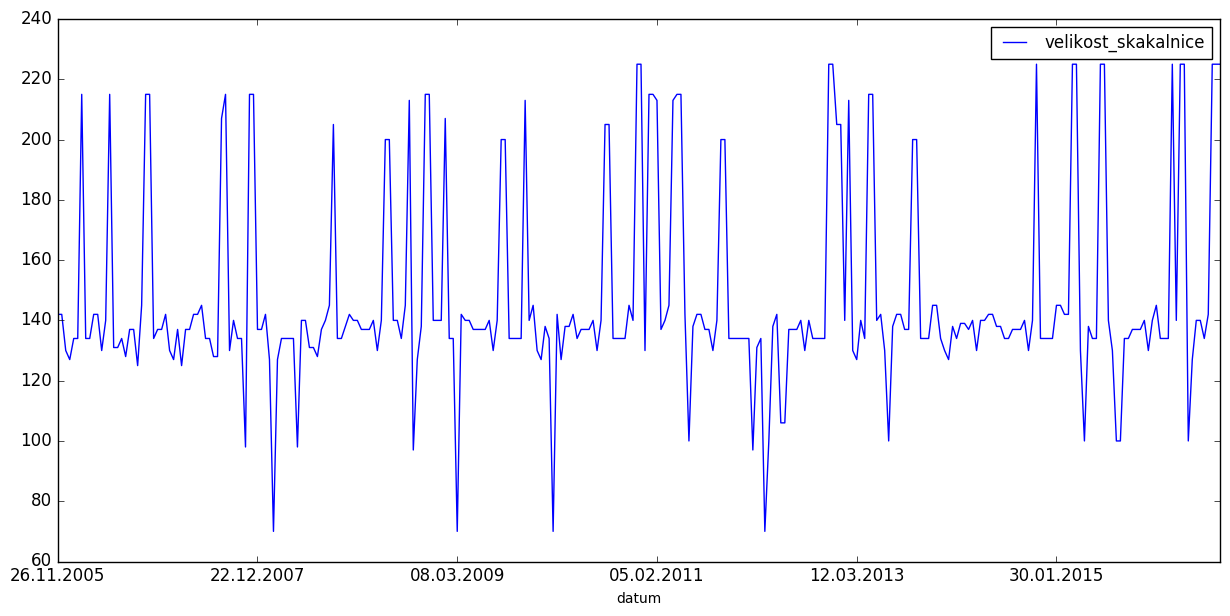

In [98]:
visine_skakalnic.plot(x='datum', y='velikost_skakalnice', figsize=(15,7), fontsize='12')

Iz grafa je razvidno, da skakalci tekmujejo tudi na skakalnicah, ki imajo višino okrog ali pa celo preko 200m. Take skakalnice imenujemo letalnice (njihova višina je višja od 180m). Ena izmed njih je tudi Letalnica Bratov Gorišek (Planica).

In [4]:
skakalnice_seznam = tekme[['prizorisce', 'velikost_skakalnice']]
skakalnice_visine = skakalnice_seznam.groupby('velikost_skakalnice').count()
skakalnice_visine

,prizorisce
velikost_skakalnice,
70,4
97,2
98,2
100,7
106,2
125,2
127,10
128,4
130,19


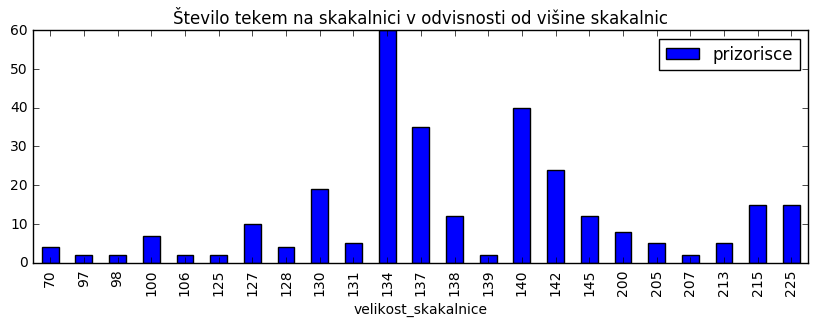

In [111]:
tabela_visine.plot(kind= 'bar', title='Število tekem na skakalnici v odvisnosti od višine skakalnic',figsize=(10,3))

Zdaj pa poglejmo, število tekem samo za letalnice. Rezultate predstavimo s tortnim diagramom, da vidimo, kakšen odstotek vseh tekem na letalnicah predstavlja določena višina letalnice.

In [5]:
letalnice = skakalnice_seznam[skakalnice_seznam.velikost_skakalnice>180]
st_letalnic = letalnice.groupby('velikost_skakalnice').count()
tabela_letalnice = pd.DataFrame(st_letalnic)
tabela_letalnice

,prizorisce
velikost_skakalnice,
200,8
205,5
207,2
213,5
215,15
225,15


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000DAE95F86A0>], dtype=object)

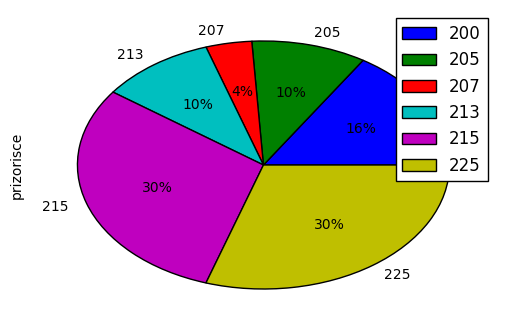

In [120]:
tabela_letalnice.plot(kind='pie', subplots=True, figsize=(6,4), autopct = '%.f%%')

In [6]:
vse_skakalnice = tekme[['velikost_skakalnice']].count()
vse_tekme = vse_skakalnice['velikost_skakalnice']
vse_tekme

292

In [7]:
vse_skakalnice = tekme[['velikost_skakalnice']]
stevilo_skakalnic = vse_skakalnice[vse_skakalnice.velikost_skakalnice < 180].count()
stevilo_skakalnic1 = stevilo_skakalnic['velikost_skakalnice']
stevilo_skakalnic1

242

In [8]:
stevilo_letalnic = vse_skakalnice[vse_skakalnice.velikost_skakalnice > 180].count()
stevilo_letalnic1 = stevilo_letalnic['velikost_skakalnice']
stevilo_letalnic1

50

Vseh tekem v obdobju med sezonama 2005/06 in 2015/16 je bilo 292. Od tega je bilo 50 tekem organiziranih na letalnicah, 242 pa na skakalnicah manjših od 180m.

In [134]:
tabelca = pd.DataFrame({'skakalnice':stevilo_skakalnic, 'letalnice':stevilo_letalnic, 'skupaj':vse_tekme})
tabelca

,letalnice,skakalnice,skupaj
velikost_skakalnice,50,242,292


In [11]:
tabela = pd.DataFrame({'letalnice (%)': stevilo_letalnic / vse_tekme * 100,
                       'skakalnice (%)': stevilo_skakalnic / vse_tekme * 100})
tabela

,letalnice (%),skakalnice (%)
velikost_skakalnice,17.123288,82.876712
